# 02 Extract XYZ Coordinates

The elevation or depth of input data is needed locate it in a 3D space. The data can either be provided when creating the data, i.e. when digitizing contour lines or by extracting it from a digital elevation model (DEM) or from an existing surface of an interface in the subsurface. For consistency, the elevation column will be denoted with ``Z``. The input vector data can be loaded again as ``GeoDataFrame`` using ``GeoPandas``. The raster from which elevation data will be extracted can either be provided as ``NumPy`` ``ndarray`` or opened with ``rasterio`` if a raster file is available on your hard disk.

<img src="../images/tutorial02_cover.png">

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [2]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/02_extract_xyz/'

## Point Data

The point data stored as shape file will be loaded as GeoDataFrame. The raster will be loaded using rasterio. 

In [3]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
import gemgis as gg

gdf = gpd.read_file(file_path + 'interfaces_points.shp')

dem = rasterio.open(file_path + 'raster.tif')

gdf.head()

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


,id,formation,geometry
0,None,Ton,POINT (19.150 293.313)
1,None,Ton,POINT (61.934 381.459)
2,None,Ton,POINT (109.358 480.946)
3,None,Ton,POINT (157.812 615.999)
4,None,Ton,POINT (191.318 719.094)


The figures below show the original raster and point data.

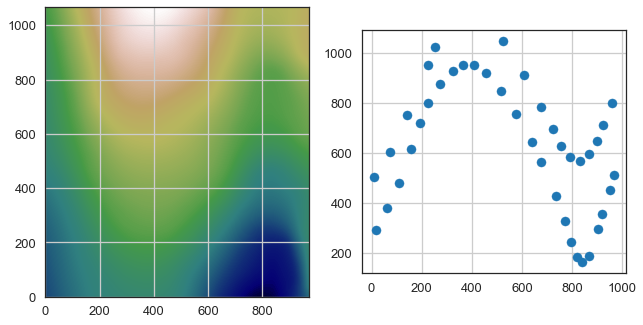

In [3]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)

ax1.imshow(dem.read(1), cmap='gist_earth', vmin=250, vmax=750, extent=[0,972,0,1069])
ax1.grid()

gdf.plot(ax=ax2, aspect='equal')
ax2.grid()

The resulting GeoDataFrame has now an additional ``X``, ``Y`` and ``Z`` column containing the coordinates of the point objects. These can now be easily used for further processing. The geometry types of the shapely objects remained unchanged. The id column was dropped by default.

In [4]:
gdf_xyz = gg.vector.extract_xyz(gdf=gdf,
                                dem=dem)

gdf_xyz.head()

,formation,geometry,X,Y,Z
0,Ton,POINT (19.150 293.313),19.15,293.31,364.99
1,Ton,POINT (61.934 381.459),61.93,381.46,400.34
2,Ton,POINT (109.358 480.946),109.36,480.95,459.55
3,Ton,POINT (157.812 615.999),157.81,616.00,525.69
4,Ton,POINT (191.318 719.094),191.32,719.09,597.63


The figures below show the elevation data (blue = 250 m, white = 750 m), the original point data and the point data including color-coded X, Y and Z values.


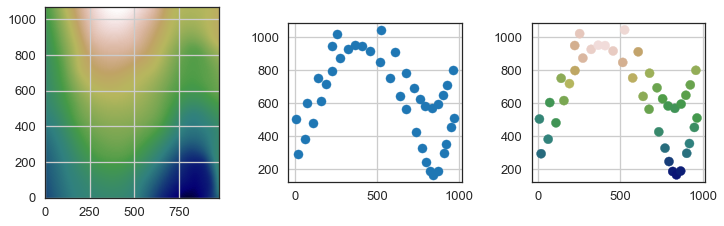

In [5]:
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(1,3)

ax1.imshow(dem.read(1), cmap='gist_earth', vmin=250, vmax=750, extent=[0,972,0,1069])
ax1.grid()

gdf.plot(ax=ax2, aspect='equal')
ax2.grid()

gdf_xyz.plot(ax=ax3, aspect='equal', column='Z', cmap='gist_earth',vmin=250, vmax=750)
ax3.grid()

plt.tight_layout()

## Line Data

The point data stored as shape file will be loaded as GeoDataFrame. The raster will be loaded using rasterio. 

In [6]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
import gemgis as gg

gdf = gpd.read_file(file_path + 'interfaces_lines.shp')

dem = rasterio.open(file_path + 'raster.tif')

gdf.head()


,id,formation,geometry
0,None,Sand1,"LINESTRING (0.256 264.862, 10.593 276.734, 17...."
1,None,Ton,"LINESTRING (0.188 495.787, 8.841 504.142, 41.0..."
2,None,Ton,"LINESTRING (970.677 833.053, 959.372 800.023, ..."


The figures below show the original raster and point data.

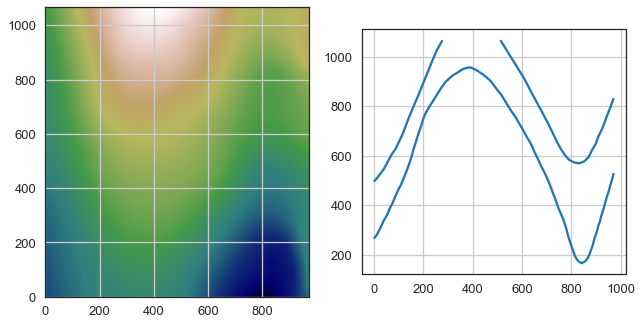

In [7]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)

ax1.imshow(dem.read(1), cmap='gist_earth', vmin=250, vmax=750, extent=[0,972,0,1069])
ax1.grid()

gdf.plot(ax=ax2, aspect='equal')
ax2.grid()

The resulting GeoDataFrame has now an additional ``X``, ``Y`` and ``Z`` column. These represent the values of the extracted vertices. The geometry types of the shapely objects in the GeoDataFrame were converted from LineStrings to Points to match the X, Y and Y column data. The ``id`` column was dropped by default. The index of the new GeoDataFrame was reset.


In [8]:
gdf_xyz = gg.vector.extract_xyz(gdf=gdf,
                                dem=dem)

gdf_xyz.head()

,formation,geometry,X,Y,Z
0,Sand1,POINT (0.256 264.862),0.26,264.86,353.97
1,Sand1,POINT (10.593 276.734),10.59,276.73,359.04
2,Sand1,POINT (17.135 289.090),17.13,289.09,364.28
3,Sand1,POINT (19.150 293.313),19.15,293.31,364.99
4,Sand1,POINT (27.795 310.572),27.80,310.57,372.81


The figures below show the elevation data (blue = 250 m, white = 750 m), the original LineString data and the extracted point data including color-coded X, Y and Z values.


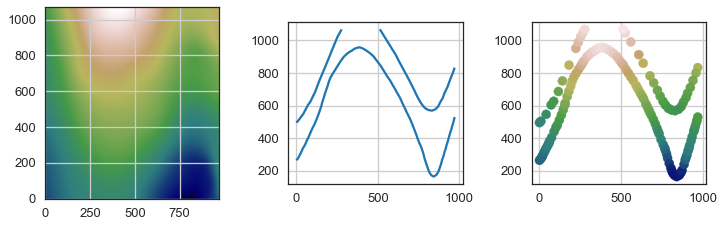

In [9]:
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(1,3)

ax1.imshow(dem.read(1), cmap='gist_earth', vmin=250, vmax=750, extent=[0,972,0,1069])
ax1.grid()

gdf.plot(ax=ax2, aspect='equal')
ax2.grid()

gdf_xyz.plot(ax=ax3, aspect='equal', column='Z', cmap='gist_earth',vmin=250, vmax=750)
ax3.grid()

plt.tight_layout()

## Polygon Data

The point data stored as shape file will be loaded as GeoDataFrame. The raster will be loaded using rasterio.

In [10]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
import gemgis as gg

gdf = gpd.read_file(file_path + 'interfaces_polygons.shp')

dem = rasterio.open(file_path + 'raster.tif')

gdf.head()

,id,formation,geometry
0,None,Sand1,"POLYGON ((0.256 264.862, 10.593 276.734, 17.13..."
1,None,Ton,"POLYGON ((0.256 264.862, 0.188 495.787, 8.841 ..."
2,None,Sand2,"POLYGON ((0.188 495.787, 0.249 1068.760, 278.5..."
3,None,Sand2,"POLYGON ((511.675 1068.852, 971.698 1068.800, ..."


The figures below show the original raster and point data.

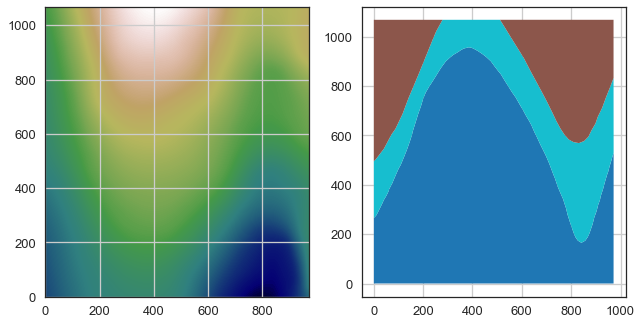

In [11]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)

ax1.imshow(dem.read(1), cmap='gist_earth', vmin=250, vmax=750, extent=[0,972,0,1069])
ax1.grid()

gdf.plot(ax=ax2, aspect='equal', column='formation')
ax2.grid()

The resulting GeoDataFrame has now an additional ``X``, ``Y`` and ``Z`` column. These represent the values of the extracted vertices. The geometry types of the shapely objects in the GeoDataFrame were converted from LineStrings to Points to match the X, Y and Y column data. The ``id`` column was dropped by default. The index of the new GeoDataFrame was reset.


In [12]:
gdf_xyz = gg.vector.extract_xyz(gdf=gdf,
                                   dem=dem)

gdf_xyz.head()

,formation,geometry,X,Y,Z
0,Sand1,POINT (0.256 264.862),0.26,264.86,353.97
1,Sand1,POINT (10.593 276.734),10.59,276.73,359.04
2,Sand1,POINT (17.135 289.090),17.13,289.09,364.28
3,Sand1,POINT (19.150 293.313),19.15,293.31,364.99
4,Sand1,POINT (27.795 310.572),27.80,310.57,372.81


The figures below show the elevation data (blue = 250 m, white = 750 m), the original Polygon data and the extracted point data including color-coded X, Y and Z values.


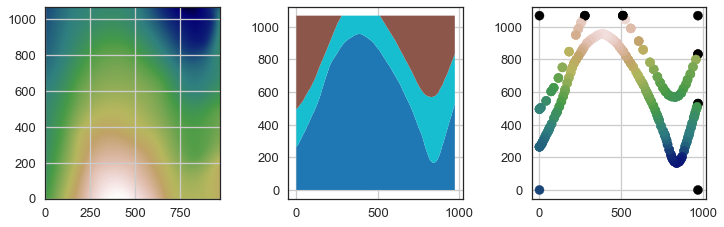

In [13]:
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(1,3)

ax1.imshow(dem.read(1), origin='lower', cmap='gist_earth', vmin=250, vmax=750, extent=[0,972,0,1069])
ax1.grid()

gdf.plot(ax=ax2, aspect='equal', column='formation')
ax2.grid()

gdf_xyz.plot(ax=ax3, aspect='equal', column='Z', cmap='gist_earth',vmin=250, vmax=750)
ax3.grid()

plt.tight_layout()

## Additional Arguments

Several additional arguments can be passed to adapt the functionality of the function. For further reference, see the [API Reference for extract_xyz](https://gemgis.readthedocs.io/en/latest/api_reference/vector_data.html).

* reset_index (bool)
* drop_id (bool)
* drop_level0 (bool)
* drop_level1 (bool)
* drop_index (bool)
* drop_points (bool)
* target_crs(str, pyproj.crs.crs.CRS)
* bbox (list)

Original function with default arguments.

In [14]:
gdf_xyz = gg.vector.extract_xyz(gdf=gdf,
                                dem=dem,
                                reset_index=True,
                                drop_id=True,
                                drop_level0=True,
                                drop_level1=True, 
                                drop_index=True, 
                                drop_points=True,
                                target_crs=gdf.crs,
                                bbox = None)

gdf_xyz.head()

,formation,geometry,X,Y,Z
0,Sand1,POINT (0.256 264.862),0.26,264.86,353.97
1,Sand1,POINT (10.593 276.734),10.59,276.73,359.04
2,Sand1,POINT (17.135 289.090),17.13,289.09,364.28
3,Sand1,POINT (19.150 293.313),19.15,293.31,364.99
4,Sand1,POINT (27.795 310.572),27.80,310.57,372.81


This time, the index is not reset and the id column is not dropped.

In [15]:
gdf_xyz = gg.vector.extract_xyz(gdf=gdf,
                                dem=dem,
                                reset_index=False,
                                drop_id=False,
                                drop_level0=True,
                                drop_level1=True, 
                                drop_index=False, 
                                drop_points=False,
                                target_crs=gdf.crs,
                                bbox = None)

gdf_xyz.head()

id formation                geometry  \
0 0  None     Sand1   POINT (0.256 264.862)   
  0  None     Sand1  POINT (10.593 276.734)   
  0  None     Sand1  POINT (17.135 289.090)   
  0  None     Sand1  POINT (19.150 293.313)   
  0  None     Sand1  POINT (27.795 310.572)   

                                      points     X      Y      Z  
0 0  (0.256327195431048, 264.86214748436396)  0.26 264.86 353.97  
  0  (10.59346813871597, 276.73370778641777) 10.59 276.73 359.04  
  0   (17.134940141888464, 289.089821570188) 17.13 289.09 364.28  
  0   (19.150128045807676, 293.313485355882) 19.15 293.31 364.99  
  0    (27.79511673965105, 310.571692592952) 27.80 310.57 372.81

The index is reset but the previous index columns ``level_0`` and ``level_1`` are kept.

In [16]:
gdf_xyz = gg.vector.extract_xyz(gdf=gdf,
                                dem=dem,
                                reset_index=True,
                                drop_id=False,
                                drop_level0=False,
                                drop_level1=False, 
                                drop_index=False, 
                                drop_points=False,
                                target_crs=gdf.crs,
                                bbox = None)

gdf_xyz.head()

,level_0,level_1,id,formation,geometry,points,X,Y,Z
0,0,0,None,Sand1,POINT (0.256 264.862),"(0.256327195431048, 264.86214748436396)",0.26,264.86,353.97
1,0,0,None,Sand1,POINT (10.593 276.734),"(10.59346813871597, 276.73370778641777)",10.59,276.73,359.04
2,0,0,None,Sand1,POINT (17.135 289.090),"(17.134940141888464, 289.089821570188)",17.13,289.09,364.28
3,0,0,None,Sand1,POINT (19.150 293.313),"(19.150128045807676, 293.313485355882)",19.15,293.31,364.99
4,0,0,None,Sand1,POINT (27.795 310.572),"(27.79511673965105, 310.571692592952)",27.80,310.57,372.81


## Background Functions

The function `extract_xy` is a combination of the following functions and their subfunctions:

- `extract_xyz_rasterio`
- `extract_xyz_array`
- `extract_xy`

For more information of these functions see the [API Reference](https://gemgis.readthedocs.io/en/latest/api_reference/vector_data.html).